# 1st Exercise

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
%matplotlib notebook

import os
import statsmodels.api as sm

## 1. 데이터 불러오기(read.csv)

In [2]:
# 현재 작업위치
os.getcwd()

'C:\\Users\\손은주\\SNU_Fintech'

In [3]:
#os.chdir('/~')

In [7]:
df = pd.read_csv('data/State.csv')

## 2. 데이터 구조 파악하기

In [8]:
df.head()

,StateCodes,State,year,GDP
0,AL,Alabama,2010,176220.75
1,AK,Alaska,2010,54220.00
2,AZ,Arizona,2010,247333.00
3,AR,Arkansas,2010,104928.75
4,CA,California,2010,1960935.00


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 260 entries, 0 to 259
Data columns (total 4 columns):
StateCodes    260 non-null object
State         260 non-null object
year          260 non-null int64
GDP           260 non-null float64
dtypes: float64(1), int64(1), object(2)
memory usage: 8.2+ KB


In [10]:
df.T #패널데이터 분석할때 많이 사용함

,0,1,2,3,4,5,6,7,8,9,...,250,251,252,253,254,255,256,257,258,259
StateCodes,AL,AK,AZ,AR,CA,CO,CT,DE,FL,GA,...,TX,UT,VT,VA,WA,WV,WI,WY,DC,US
State,Alabama,Alaska,Arizona,Arkansas,California,Colorado,Connecticut,Delaware,Florida,Georgia,...,Texas,Utah,Vermont,Virginia,Washington,West Virginia,Wisconsin,Wyoming,District of Columbia,United States
year,2010,2010,2010,2010,2010,2010,2010,2010,2010,2010,...,2014,2014,2014,2014,2014,2014,2014,2014,2014,2014
GDP,176221,54220,247333,104929,1.96094e+06,258148,230357,57673.8,729762,407999,...,1.60198e+06,140565,29661.8,462243,422766,74432.8,293341,40875.5,116539,1.72331e+07


## 3. 기초통계량(describe)

In [11]:
df.describe(include='all') #52개 * 5년 데이터구나 파악가능

,StateCodes,State,year,GDP
count,260,260,260.000000,2.600000e+02
unique,52,52,NaN,NaN
top,AZ,Idaho,NaN,NaN
freq,5,5,NaN,NaN
mean,NaN,NaN,2012.000000,6.160688e+05
std,NaN,NaN,1.416941,2.197262e+06
min,NaN,NaN,2010.000000,2.640650e+04
25%,NaN,NaN,2011.000000,8.375225e+04
50%,NaN,NaN,2012.000000,1.942938e+05
75%,NaN,NaN,2013.000000,4.173401e+05


In [12]:
df.dtypes

StateCodes     object
State          object
year            int64
GDP           float64
dtype: object

In [13]:
df.year = df.year.astype(object)
df.dtypes

StateCodes     object
State          object
year           object
GDP           float64
dtype: object

In [15]:
loan = pd.read_csv('data/loan.csv')

In [16]:
loan.head()

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,issue_d,loan_status,url
0,1,5000.0,5000.0,36 months,10.65%,162.87,B,B2,RENT,24000.0,11-Dec,Fully Paid,NaN
1,2,2500.0,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.0,11-Dec,Charged Off,NaN
2,3,2400.0,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.0,11-Dec,Fully Paid,NaN
3,4,10000.0,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.0,11-Dec,Fully Paid,NaN
4,5,3000.0,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.0,11-Dec,Fully Paid,NaN


In [17]:
loan.describe()

,loan_amnt,funded_amnt,installment,annual_inc,url
count,3749.000000,3749.000000,3749.000000,3.745000e+03,0.0
mean,10017.631368,9733.802347,312.055268,6.893535e+04,NaN
std,6781.205405,6460.579725,207.617467,6.123424e+04,NaN
min,500.000000,500.000000,15.670000,1.896000e+03,NaN
25%,5000.000000,5000.000000,159.180000,3.850000e+04,NaN
50%,8000.000000,8000.000000,264.610000,5.500400e+04,NaN
75%,14000.000000,13250.000000,416.750000,8.000000e+04,NaN
max,35000.000000,35000.000000,1243.850000,1.440000e+06,NaN


In [18]:
# pd.crosstab(데이터 내 변수1, 데이터 내 변수2): 두변수의 교차테이블을 생성
# 범주형 변수 간에 의미있는 분포를 파악할 수 있습니다!
## option: margin/ normalize

pd.crosstab(loan.grade, loan.sub_grade)

sub_grade,A1,A2,A3,A4,A5,B1,B2,B3,B4,B5,...,F1,F2,F3,F4,F5,G1,G2,G3,G4,G5
grade,,,,,,,,,,,,,,,,,,,,,
A,30,40,45,79,106,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
B,0,0,0,0,0,123,113,157,150,165,...,0,0,0,0,0,0,0,0,0,0
C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
D,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
E,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
F,0,0,0,0,0,0,0,0,0,0,...,71,64,52,43,38,0,0,0,0,0
G,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,37,30,31,45,56


In [19]:
pd.crosstab(loan.grade, loan.home_ownership, margins=True)

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT,All
grade,,,,,,
A,139,4,1,19,137,300
B,291,0,4,45,368,708
C,358,0,8,63,407,836
D,335,0,9,62,424,830
E,248,0,7,48,305,608
F,114,1,2,12,139,268
G,99,0,7,13,80,199
All,1584,5,38,262,1860,3749


In [20]:
pd.crosstab(loan.grade, loan.home_ownership, margins=True, normalize=True)

home_ownership,MORTGAGE,NONE,OTHER,OWN,RENT,All
grade,,,,,,
A,0.037077,0.001067,0.000267,0.005068,0.036543,0.080021
B,0.077621,0.000000,0.001067,0.012003,0.098160,0.188850
C,0.095492,0.000000,0.002134,0.016804,0.108562,0.222993
D,0.089357,0.000000,0.002401,0.016538,0.113097,0.221392
E,0.066151,0.000000,0.001867,0.012803,0.081355,0.162177
F,0.030408,0.000267,0.000533,0.003201,0.037077,0.071486
G,0.026407,0.000000,0.001867,0.003468,0.021339,0.053081
All,0.422513,0.001334,0.010136,0.069885,0.496132,1.000000


In [21]:
## []리스트를 이용해서 세 개 변수 이상의 교차 테이블 생성
cross_tab = pd.crosstab([loan.grade, loan.sub_grade], loan.term)
cross_tab

term              36 months   60 months
grade sub_grade                        
A     A1                 30           0
      A2                 40           0
      A3                 45           0
      A4                 75           4
      A5                102           4
B     B1                118           5
      B2                107           6
      B3                138          19
      B4                135          15
      B5                135          30
C     C1                157          24
      C2                172          23
      C3                141          22
      C4                151          15
      C5                117          14
D     D1                148           2
      D2                138          39
      D3                142          37
      D4                139          34
      D5                123          28
E     E1                 94          31
      E2                110          43
      E3                 91          36
      E4                 80          28
      E5                 68          27
F     F1                 51          20
      F2                 50          14
      F3                 41          11
      F4                 31          12
      F5                 30           8
G     G1                 27          10
      G2                 22           8
      G3                 25           6
      G4                 39           6
      G5                 51           5

## 4. 변수 재정의 및 변수 생성/ 삭제

In [22]:
# 구간화: digitize, linspace: numpy
d = np.linspace(500,15000,5)
loan['loan_amnt_group'] = np.digitize(loan['loan_amnt'],d)

In [23]:
pd.crosstab(loan.loan_amnt_group, loan.grade)

grade,A,B,C,D,E,F,G
loan_amnt_group,,,,,,,
1,64,131,156,197,127,31,31
2,81,174,229,232,183,52,38
3,74,149,174,145,113,59,30
4,36,110,94,74,50,29,27
5,45,144,183,182,135,97,73


In [24]:
loan.groupby('loan_amnt_group').describe()['loan_amnt']

,count,mean,std,min,25%,50%,75%,max
loan_amnt_group,,,,,,,,
1,737.0,2697.862958,946.298215,500.0,2000.0,3000.0,3500.0,4100.0
2,989.0,5870.298281,1001.396109,4125.0,5000.0,6000.0,7000.0,7700.0
3,744.0,9375.638441,969.202105,7750.0,8400.0,9887.5,10000.0,11325.0
4,420.0,12766.547619,962.758187,11400.0,12000.0,12250.0,13800.0,14725.0
5,859.0,20284.778813,4716.249140,15000.0,16000.0,20000.0,24000.0,35000.0


In [25]:
loan.groupby(['term','grade']).mean()['annual_inc']

term        grade
 36 months  A        64972.615521
            B        70007.524850
            C        68319.035583
            D        65977.380507
            E        62721.940858
            F        75849.005025
            G        91419.947561
 60 months  A        54516.500000
            B        64385.106667
            C        69120.412245
            D        62383.651571
            E        73378.564121
            F        79301.146154
            G        85188.057143
Name: annual_inc, dtype: float64

In [26]:
loan.loan_amnt.corr(loan.installment)

0.9350159951769897

In [27]:
loan_dummy = pd.get_dummies(loan['grade'])
loan_dummy

,A,B,C,D,E,F,G
0,0,1,0,0,0,0,0
1,0,0,1,0,0,0,0
2,0,0,1,0,0,0,0
3,0,0,1,0,0,0,0
4,0,1,0,0,0,0,0
5,1,0,0,0,0,0,0
6,0,0,1,0,0,0,0
7,0,0,0,0,1,0,0
8,0,0,0,0,0,1,0
9,0,1,0,0,0,0,0


In [28]:
loan_add_dummy = loan.join(loan_dummy.add_prefix('Grade_'))
loan_add_dummy

,id,loan_amnt,funded_amnt,term,int_rate,installment,grade,sub_grade,home_ownership,annual_inc,...,loan_status,url,loan_amnt_group,Grade_A,Grade_B,Grade_C,Grade_D,Grade_E,Grade_F,Grade_G
0,1,5000.0,5000.0,36 months,10.65%,162.87,B,B2,RENT,24000.00,...,Fully Paid,NaN,2,0,1,0,0,0,0,0
1,2,2500.0,2500.0,60 months,15.27%,59.83,C,C4,RENT,30000.00,...,Charged Off,NaN,1,0,0,1,0,0,0,0
2,3,2400.0,2400.0,36 months,15.96%,84.33,C,C5,RENT,12252.00,...,Fully Paid,NaN,1,0,0,1,0,0,0,0
3,4,10000.0,10000.0,36 months,13.49%,339.31,C,C1,RENT,49200.00,...,Fully Paid,NaN,3,0,0,1,0,0,0,0
4,5,3000.0,3000.0,60 months,12.69%,67.79,B,B5,RENT,80000.00,...,Fully Paid,NaN,1,0,1,0,0,0,0,0
5,6,5000.0,5000.0,36 months,7.90%,156.46,A,A4,RENT,36000.00,...,Fully Paid,NaN,2,1,0,0,0,0,0,0
6,7,7000.0,7000.0,60 months,15.96%,170.08,C,C5,RENT,47004.00,...,Fully Paid,NaN,2,0,0,1,0,0,0,0
7,8,3000.0,3000.0,36 months,18.64%,109.43,E,E1,RENT,48000.00,...,Fully Paid,NaN,1,0,0,0,0,1,0,0
8,9,5600.0,5600.0,60 months,21.28%,152.39,F,F2,OWN,40000.00,...,Charged Off,NaN,2,0,0,0,0,0,1,0
9,10,5375.0,5375.0,60 months,12.69%,121.45,B,B5,RENT,15000.00,...,Charged Off,NaN,2,0,1,0,0,0,0,0


## 5. 그림

In [29]:
#데이터, 변수명.plot(kind=line, bar, barh, hist, box, kde, density, area, scatter, pie)

# loan.loan_amnt.plot(kind='hist', figsize=(10,10), bins=30, range=(0,40000),alpha=0.5)

In [30]:
#대출금액이 12000이상, 대출 등급 A인 건들 출력
# sub = loan[(loan.grade=='A')& (loan.loan_amnt >12000)]
# sub.loan_amnt.plot(kind='hist', figsize=(10,10), bins=30, range=(0,40000))

In [31]:
# loan.plot(kind='scatter', x='loan_amnt', y='annual_inc', logy=True, logx=True, figsize=(15,10))

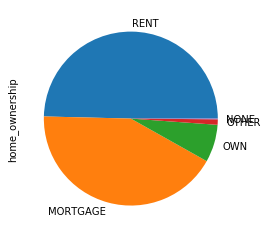

In [32]:
loan.home_ownership.value_counts().plot(kind='pie')